## This notebook presents steps to estimate $ET_0$ using the FAO Penman-Monteith method (Allen, 1998). 
Author: M. Vremec, University of Graz, 2020

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import pyet as et

### Import meteorological data

In [2]:
meteo = pd.read_csv("data/meteod.csv", parse_dates=True, index_col=0, dayfirst=True)
tmax = meteo.loc[:,"tmax"]
tmin = meteo.loc[:,"tmin"]
rh = meteo.loc[:,"rh"]
wind = meteo.loc[:,"wind"]
solar = meteo.loc[:,"solar"]
elevation = 145.93
latitude = -17.94 * 3.141592654 / 180

### Use the .pm_fao56 method

In [3]:
fao56 = et.pm_fao56(wind, elevation, latitude, solar=solar, tmax=tmax, tmin=tmin, rh=rh)

### Plot results

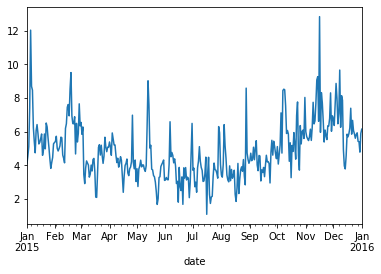

In [4]:
fao56.plot()
plt.show()